Diego Toribio <br>
Professor Fred Fontaine <br>
EID-378 Finance <br>
Problem Set I: Overview of Finance <br>

In [11]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Section 1

There are two assets whose returns are modelled as depending on 6 possible outcomes (with unequal probabilities) as given in the table below:

| Scenario | Probability | R₁  | R₂  |
|----------|-------------|-----|-----|
| ω₁       | 0.2         | 0.03| 0.09|
| ω₂       | 0.2         | 0.17| 0.16|
| ω₃       | 0.3         | 0.28| 0.10|
| ω₄       | 0.2         | 0.05| 0.02|
| ω₅       | 0.1         | -0.04|0.15|

Do the computations in Python, preferably entering the above as a pandas DataFrame (e.g., the indexes should be ‘w1’ standing in for ω₁, etc.). Because the probabilities are not equal, you cannot use built-in methods like `.mean()` or `.std()`.
<br>
<br>
<br>
(a) Compute the expected return and standard deviation for each asset, and the (Pearson) correlation (coefficient) for the two returns. 
<br>
<br>


(b) Create an experiment where, in each trial, the respective outcomes occur with the indicated probabilities. For $N = 1000$ trials, plot histograms of $R_1$ and $R_2$, and estimate the mean, standard deviation, and correlation coefficient. For example, if $R_1(n)$ is the value of $R_1$ at the $n^{th}$ trial, then the estimated mean would be $\frac{1}{N} \sum_{n=1}^{N} R_1(n)$ . **Remark:** There are several ways to generate the outcomes with the indicated probabilities. One technique is to generate a random variable $X$ uniformly in the range $[0, 1)$, then 

$$
\omega(X) = 
\begin{cases} 
\omega_1 & \text{if } 0 < X < 0.2 \\[6pt]
\omega_2 & \text{if } 0.2 < X < 0.4 \\[6pt]
\omega_3 & \text{if } 0.4 < X < 0.7
\end{cases}
$$

**Note:** The “averaging” is performed with a uniform weighting!
<br>
<br>

(c) Compare the statistical parameters estimated via your simulation with the actual values: create and display (print) a comparison table. **Note:** Estimating these parameters by performing simulations driven by a random model according to a prescribed distribution is called the *Monte Carlo* method.  




In [3]:
# data setup
data = {
    'p': [0.2, 0.2, 0.3, 0.2, 0.1],
    'R1': [0.03, 0.17, 0.28, 0.05, -0.04],
    'R2': [0.09, 0.16, 0.10, 0.02, 0.15]
}

df = pd.DataFrame(data, index=['w1', 'w2', 'w3', 'w4', 'w5'])
print(tabulate(df, headers="keys", tablefmt="pretty"))

+----+-----+-------+------+
|    |  p  |  R1   |  R2  |
+----+-----+-------+------+
| w1 | 0.2 | 0.03  | 0.09 |
| w2 | 0.2 | 0.17  | 0.16 |
| w3 | 0.3 | 0.28  | 0.1  |
| w4 | 0.2 | 0.05  | 0.02 |
| w5 | 0.1 | -0.04 | 0.15 |
+----+-----+-------+------+


## 1.1 - Expected Return, Standard Deviation, and Correlation 

Since not every scenario occurs with the same frequency, we must use weighted sums to correctly compute the average (expected) return and measures of risk

- **Expected Return:**

Each scenario $\omega_j$ occurs with probability $p_j$. The expected return of an asset is the weighted average of its possible returns.\

$$
E[R_i] = \sum_{j} p_j\, R_{i,j} \quad \text{for } i = 1,2,
$$

where $R_{i,j}$ is the return of an asset $i$ in scenario $j$.

<br>
<br>

- **Variance Standard Deviation ($\sigma_i$):**

Variance measures how much the returns deviate from the expected return, weighted by the likelihood of each scenario:


$$
\text{Var}(R_i) = \sigma_i^2 = \sum_{j} p_j\, \left(R_{i,j} - \mathbb{E}[R_i]\right)^2.
$$

The Standard Deviation is the square root of the variance, providing a measure of risk in the same units as the returns:

$$
\sigma_i = \sqrt{\sigma_i^2},
$$


<br>
<br>

- **Pearson Correlation Coefficient ($\rho_{1,2}$):**

The Pearson correlation coefficient quantifies the relationship between the two assets. First, we compute the weighted covariance:

$$
\quad \text{Cov}(R_1,R_2) = \sum_{j} p_j\, \left(R_{1,j} - \mathbb{E}[R_1]\right)\left(R_{2,j} - \mathbb{E}[R_2]\right)
$$

Then, we normalize this covariance by the product of the standard deviations to get the correlation: 

$$
  \rho_{12} = \frac{\text{Cov}(R_1,R_2)}{\sigma_1\,\sigma_2} .
$$

In [5]:
# compute weighted expected returns
mu_R1 = (df['p'] * df['R1']).sum()
mu_R2 = (df['p'] * df['R2']).sum()

# compute weighted variances and standard deviations
var_R1 = (df['p'] * (df['R1'] - mu_R1)**2).sum()
var_R2 = (df['p'] * (df['R2'] - mu_R2)**2).sum()
std_R1 = np.sqrt(var_R1)
std_R2 = np.sqrt(var_R2)

# compute weighted covariance between R1 and R2
covariance = (df['p'] * (df['R1'] - mu_R1) * (df['R2'] - mu_R2)).sum()

# compute Pearson correlation coefficient
corr = covariance / (std_R1 * std_R2)

# prepare the results table
results = [
    [r"$\mathbb{E}[R_1]$", f"{mu_R1:.3f}"],
    [r"$\mathbb{E}[R_2]$", f"{mu_R2:.3f}"],
    [r"$\sigma_1$", f"{std_R1:.3f}"],
    [r"$\sigma_2$", f"{std_R2:.3f}"],
    [r"$\rho_{1,2}$", f"{corr:.3f}"]
]
md_table = tabulate(results, headers=["Parameter", "Value"], tablefmt="pipe")
display(Markdown(md_table))

| Parameter         |   Value |
|:------------------|--------:|
| $\mathbb{E}[R_1]$ |   0.13  |
| $\mathbb{E}[R_2]$ |   0.099 |
| $\sigma_1$        |   0.115 |
| $\sigma_2$        |   0.048 |
| $\rho_{1,2}$      |   0.203 |

# 1.2 -  Estimate Parameters

In this part we perform a Monte Carlo simulation to approximate the theoretical parameters computed earlier. The idea is to simulate $N = 1000$ independent trials, where each trial represents a random draw of one of the scenarios according to its specified probability. For each trial, we record the corresponding returns $R_1$ and $R_2$. Using these simulated outcomes, we then estimate the mean, standard deviation, and Pearson correlation coefficient using uniform averaging (i.e., each trial is weighted equally).

<br>

- **Outcome Generation:**

Since each scenario $\omega_j$ has a different probability $p_j$, we generate a random scenario for each trial by drawing from the scenarios according to these probabilities. This mimics the real-world process where some outcomes are more likely than others.
 

<br>

- **Uniform Averaging:** 

Once the outcomes are generated, each trial contributes equally to the average. This is why we compute the sample mean as:

$$
\widehat{\mathbb{E}}[R_i] = \frac{1}{N} \sum_{n=1}^{N} R_i(n),
$$
  
and similarly for the standard deviation and correlation.



| Parameter                   |   Value |
|:----------------------------|--------:|
| $\widehat{\mathbb{E}}[R_1]$ |   0.128 |
| $\widehat{\mathbb{E}}[R_2]$ |   0.1   |
| $\widehat{\sigma}_{1}$      |   0.116 |
| $\widehat{\sigma}_{2}$      |   0.047 |
| $\widehat{\rho}_{1,2}$      |   0.175 |

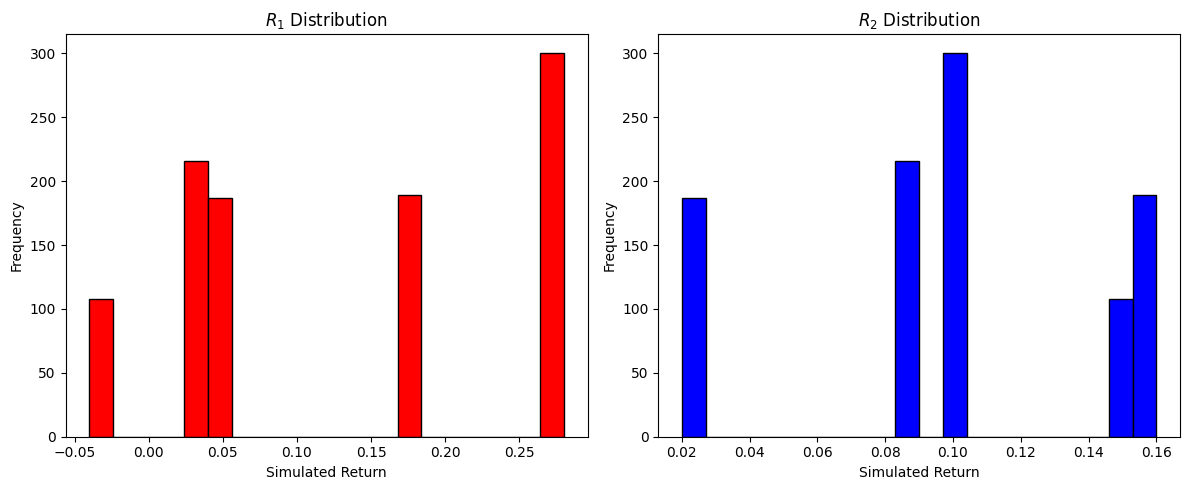

In [7]:
N = 1000  # number of trials
scenarios = df.index.tolist()
probs = df['p'].values

# Generate N outcomes: each outcome is one of the scenarios 'w1', ..., 'w5'
simulated_scenarios = np.random.choice(scenarios, size=N, p=probs)

# retrieve the corresponding returns for each simulated scenario
R1_sim = df.loc[simulated_scenarios, 'R1'].values
R2_sim = df.loc[simulated_scenarios, 'R2'].values

# statistical Estimates
mu_R1_sim = np.mean(R1_sim)
mu_R2_sim = np.mean(R2_sim)
std_R1_sim = np.std(R1_sim, ddof=0)
std_R2_sim = np.std(R2_sim, ddof=0)
corr_sim = np.corrcoef(R1_sim, R2_sim)[0, 1]

# display results
results_sim = [
    [r"$\widehat{\mathbb{E}}[R_1]$", f"{mu_R1_sim:.3f}"],
    [r"$\widehat{\mathbb{E}}[R_2]$", f"{mu_R2_sim:.3f}"],
    [r"$\widehat{\sigma}_{1}$", f"{std_R1_sim:.3f}"],
    [r"$\widehat{\sigma}_{2}$", f"{std_R2_sim:.3f}"],
    [r"$\widehat{\rho}_{1,2}$", f"{corr_sim:.3f}"]
]

md_table_sim = tabulate(results_sim, headers=["Parameter", "Value"], tablefmt="pipe")
display(Markdown(md_table_sim))


# plotting Histograms
plt.figure(figsize=(12, 5))

# histogram for R1
plt.subplot(1, 2, 1)
plt.hist(R1_sim, bins=20, color='red', edgecolor='black')
plt.title("$R_1$ Distribution")
plt.xlabel("Simulated Return")
plt.ylabel("Frequency")

# histogram for R2
plt.subplot(1, 2, 2)
plt.hist(R2_sim, bins=20, color='blue', edgecolor='black')
plt.title("$R_2$ Distribution")
plt.xlabel("Simulated Return")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## 1.3 - Compare Theoretical and Simulated Parameters

In this section, we compare the parameters computed theoretically in 1(a) with those estimated via our Monte Carlo simulation in 1(b). 

In [8]:
comparison_results = [
    [r"$E[R_1]$", f"{mu_R1:.4f}", f"{mu_R1_sim:.4f}"],
    [r"$E[R_2]$", f"{mu_R2:.4f}", f"{mu_R2_sim:.4f}"],
    [r"$\sigma_{R_{1}}$", f"{std_R1:.4f}", f"{std_R1_sim:.4f}"],
    [r"$\sigma_{R_{2}}$", f"{std_R2:.4f}", f"{std_R2_sim:.4f}"],
    ["Correlation Coefficient", f"{corr:.4f}", f"{corr_sim:.4f}"]
]

# Generate a Markdown table using the 'pipe' format
md_table_comp = tabulate(comparison_results, headers=["Parameter", "Theoretical", "Simulated"], tablefmt="pipe")
display(Markdown(md_table_comp))

| Parameter               |   Theoretical |   Simulated |
|:------------------------|--------------:|------------:|
| $E[R_1]$                |        0.13   |      0.1348 |
| $E[R_2]$                |        0.099  |      0.0976 |
| $\sigma_{R_{1}}$        |        0.1151 |      0.1163 |
| $\sigma_{R_{2}}$        |        0.0476 |      0.0468 |
| Correlation Coefficient |        0.2025 |      0.2121 |

# Section 2

We are pursuing a short-selling strategy, where we have shorted 300 shares of XYZ at price $40.  
The initial margin required by the broker is 50% of the overall value, and the maintenance margin is 25%.


(a) Determine the initial condition of the balance sheet: assets, liabilities, and equity.

(b) What is the limit price of the stock before we are slapped with a margin call?

(c) The stock price falls to $35. What is our leverage before and after the stock price change? What is the ROE? What is our margin ratio after the price change?





## 2.1 - Initial Balance Sheet

When short-selling, we borrow shares to sell them at the current market price, aiming to buy them back later at a lower price. The broker requires an initial margin deposit as collateral, ensuring we can cover potential losses. When we set up the balance sheet, we track three key things:

- **Assets:** The cash you get from selling the borrowed shares, plus the margin deposit. 
- **Liabilities:** The cost of buying back the borrowed shares at the current market price.  
- **Equity:** The difference between your assets and liabilities, the value of your position.

<br>

We can calculate each using the following:

- **Short Sale Proceeds:**  

    Since we're selling 300 shares at $40 each, the proceeds are:

$$
\text{Proceeds} = 300 \times 40 = \$12,\!000.
$$

- **Margin Deposit (Equity Contribution):**

    The broker requires a deposit equal to 50% of the proceeds:

$$
\text{Margin Deposit} = 0.50 \times 12,\!000 = \$6,\!000.
$$

- **Total Assets:**  

    We add the short sale proceeds and the margin deposit to get the total assets:

$$
\text{Assets} = 12,\!000 + 6,\!000 = \$18,\!000.
$$

  
- **Liabilities:**

    The liability is the cost of buying back the 300 borrowed shares at the current price of $40:

$$
\text{Liabilities} = 300 \times 40 = \$12,\!000.
$$

  
- **Equity:**

    We calculate quity by subtracting liabilites from assets:

$$
\text{Equity} = \text{Assets} - \text{Liabilities} = 18,\!000 - 12,\!000 = \$6,\!000.
$$

In [9]:
n_shares = 300
initial_price = 40.0
initial_margin_requirement = 0.50
maintenance_margin = 0.25

# calculations
proceeds = n_shares * initial_price 
margin_deposit = initial_margin_requirement * proceeds

# total assets
assets = proceeds + margin_deposit    

# liabilities
liabilities = proceeds 

# equity
equity = assets - liabilities                

data = [
    ["Assets", f"${assets:.2f}"],
    ["Liabilities", f"${liabilities:.2f}"],
    ["Equity", f"${equity:.2f}"]
]
table = tabulate(data, headers=["Category", "Amount"], tablefmt="pretty")
print(table)

+-------------+-----------+
|  Category   |  Amount   |
+-------------+-----------+
|   Assets    | $18000.00 |
| Liabilities | $12000.00 |
|   Equity    | $6000.00  |
+-------------+-----------+


## 2.2 - Limit Price Before a Margin Call


A margin call occurs when the stock price rises to the point where equity falls below the maintenance margin. Since the broker requires 25% of the current market value as equity, we can determine the limit price by equating equity to 25% of the liability.  

- **Liabilities and Equity:**  
  As the stock price changes to $P$, liabilities increase because the 300 borrowed shares must be repurchased at the new price:
  $$
  \text{Liabilities} = 300 \times P.
  $$
  Assets remain fixed at $\$18,000$, so equity is:
  $$
  \text{Equity} = 18,\!000 - 300P.
  $$

- **Margin Call Condition:**  
  A margin call is triggered when equity falls to 25% of the liabilities:
  $$
  18,\!000 - 300P = 0.25 \times (300P).
  $$

- **Solving for $P$:**  
  Simplifying:
  $$
  18,\!000 - 300P = 75P \quad\Longrightarrow\quad 18,\!000 = 375P.
  $$
  Divide both sides by 375:
  $$
  P = \frac{18,\!000}{375} = \$48.
  $$

- **Interpretation:**  
  If the stock price exceeds $\$48$, equity will fall below the maintenance margin, and a margin call will be issued.  

In [16]:
limit_price = assets / ((1 + maintenance_margin) * n_shares)
print("Limit Price Before Margin Call: ${:.2f}".format(limit_price))

Limit Price Before Margin Call: $48.00


## 2.3 Impact of a Price Drop: Leverage, ROE, and Margin Ratio

When the stock price falls to \$35, the balance sheet changes, affecting leverage, return on equity (ROE), and the margin ratio. Below is the breakdown of each calculation.  

- **New Liabilities:**  
  Since the short position requires buying back 300 shares at \$35 each, the new liability is:  

$$
\text{Liabilities} = 300 \times 35 = \$10,\!500.
$$

- **New Equity:**  
  With assets fixed at $\$18,000$, equity becomes:  

$$
\text{Equity} = 18,\!000 - 10,\!500 = \$7,\!500.
$$

- **Leverage:**  
  Leverage measures how much of the total assets are funded by equity. Lower leverage indicates a less risky position. The initial leverage is calculated using the initial equity, and the new leverage is calculated using the updated equity:

$$
\text{Initial Leverage} = \frac{18,\!000}{6,\!000} = 3, \quad
\text{New Leverage} = \frac{18,\!000}{7,\!500} = 2.4.
$$

- **Return on Equity (ROE):**

  ROE measures the profitability of the position relative to the initial equity. The profit is the difference between the short sale proceeds and the current cost of repurchasing the shares:

$$
\text{Profit} = 12,\!000 - 10,\!500 = \$1,\!500.
$$

ROE is then calculated as profit divided by the initial equity:



$$
\text{ROE} = \frac{1,\!500}{6,\!000} = 25\%.
$$

- **Margin Ratio:**  
  The margin ratio shows the proportion of equity relative to the current market value of the short position:

$$
\text{Margin Ratio} = \frac{7,\!500}{10,\!500} \approx 71.43\%.
$$

In [10]:
new_price = 35.0
new_liabilities = n_shares * new_price          
new_equity = assets - new_liabilities           

# leverage:
initial_leverage = assets / equity              
new_leverage = assets / new_equity              

# Return on Equity (ROE)
roe = (new_equity - equity) / equity            

# margin Ratio
margin_ratio = new_equity / new_liabilities      

data = [
    ["Initial Leverage", f"{initial_leverage:.2f}"],
    ["New Leverage", f"{new_leverage:.2f}"],
    ["Return on Equity (ROE)", f"{roe:.2%}"],
    ["Margin Ratio", f"{margin_ratio:.2%}"]
]

table = tabulate(data, headers=["Metric", "Value"], tablefmt="pretty")
print(table)

+------------------------+--------+
|         Metric         | Value  |
+------------------------+--------+
|    Initial Leverage    |  3.00  |
|      New Leverage      |  2.40  |
| Return on Equity (ROE) | 25.00% |
|      Margin Ratio      | 71.43% |
+------------------------+--------+


# Section 3

The annual returns of two stock shares are represented by the following **linear factor model**:

$$
R_1 = a_1 + b_1 R_m + \epsilon_1
$$

$$
R_2 = a_2 + b_2 R_m + \epsilon_2
$$

The common factor $ R_m $ represents a **systematic market risk** (e.g., the return of a stock market index), and $ \epsilon_1, \epsilon_2 $ are *specific risk factors*. This is explained by the concept that we assume $ R_m, \epsilon_1, \epsilon_2 $ are **uncorrelated** with each other. In a sense, $ R_m $ represents the **part of risk common to** $ R_1, R_2 $, and if only that were present, they would be **perfectly correlated** (i.e., the correlation coefficient would be $ \pm1 $), while $ \epsilon_1, \epsilon_2 $ represent the **"portions" of $ R_1, R_2 $ that are uncorrelated** with each other.

Assume:

$$
R_m \sim N(\mu_m, \sigma_m^2), \quad \epsilon_1 \sim N(\mu_1, \sigma_1^2), \quad \epsilon_2 \sim N(\mu_2, \sigma_2^2).
$$

Suppose we have a **portfolio** with the two assets, with weights $ w_1, w_2 $, 

$$
w_1 + w_2 = 1, \quad w_i \geq 0.
$$

That is, the **overall portfolio return** is:

$$
R_{TOT} = w_1 R_1 + w_2 R_2.
$$

We can write:

$$
P(R_{TOT} < 0) = A + B \Phi(\beta)
$$

where $ \Phi(\cdot) $ is the **CDF of a Gaussian**, and $ A, B, \beta $ are constants. Express these constants in terms of the given parameters: $ (\mu_m, \sigma_m, a_i, b_i, \mu_i, \sigma_i, w_i \quad \text{for} \quad i = 1,2). $ **Hint:** As a first step, express $ R_{TOT} $ **directly in terms of** $ R_m, \epsilon_1, \epsilon_2 $.

## 3.1 - Expressing the Portfolio Return

We define the portfolio return as a linear combination of the individual asset returns. Each asset is modeled as: 

$$R_i = a_i + b_i R_m + \epsilon_i \quad (i = 1, 2).$$

Here:
- **Systematic Risk $(R_m)$**: This represents the portion of each asset's return that is influenced by broader market movements.

- **Specific Risk $(\epsilon_1, \epsilon_2)$**: These represent the portion of each asset’s return that is unique to that asset, unrelated to market movements, and independent of each other.


The portfolio weights $w_1$ and $w_2$ represent the fraction of the total investment allocated to each stock. Since the portfolio's total return depends on both the individual stock returns and how much money is invested in each, we calculate it as a weighted average:

$$R_{TOT} = w_1 * R_{1} + w_2 * R_{2} .$$

Substituting the expressions for \(R_1\) and \(R_2\):

$$
R_{TOT} = w_1 (a_1 + b_1 R_m + \epsilon_1) + w_2 (a_2 + b_2 R_m + \epsilon_2).
$$

We can rearrange this to group the constant terms, market component, and specific risks:

$$
R_{TOT} = (w_1 a_1 + w_2 a_2) + (w_1 b_1 + w_2 b_2) R_m + (w_1 \epsilon_1 + w_2 \epsilon_2).
$$

For convenience, let’s define:
- $c = w_1 a_1 + w_2 a_2$ (the constant part)
- $\beta = w_1 b_1 + w_2 b_2$ (the portfolio’s sensitivity to the market)
- $\epsilon_{TOT} = w_1 \epsilon_1 + w_2 \epsilon_2$ (the combined specific risk)


This simplifies the expression to:

$$
R_{TOT} = c + \beta R_m + \epsilon_{TOT}.
$$

<br>

#### Deriving the Mean and Variance of Portfolio Return

Since $R_m$ and $\epsilon_{TOT}$ are independent and normally distributed, the mean and variance of $R_{TOT}$ can be found by applying the properties of linear combinations of random variables.

- **Mean Calculation:**

The expected return of the portfolio is the sum of the constant component ($c$), the expected market return weighted by the portfolio’s sensitivity ($\beta \mu_m$), and the combined expected specific risk ($\tilde{\mu}$). 

Since $\mathbb{E}[R_m] = \mu_m$ and $\mathbb{E}[\epsilon_{TOT}] = w_1 \mu_1 + w_2 \mu_2 = \tilde{\mu}$, we have:

$$
\mu_{TOT} = \mathbb{E}[R_{TOT}] = c + \beta \mu_m + \tilde{\mu}
$$

- **Variance Calculation:**

The variance of the portfolio is the sum of the variance of the market component and the variance of the combined specific risk, since these components are independent. 

Using $\text{Var}(R_m) = \sigma_m^2$ and $\text{Var}(\epsilon_{TOT}) = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 = \tilde{\sigma}^2$, we have:

$$
\sigma_{TOT}^2 = \beta^2 \sigma_m^2 + \tilde{\sigma}^2
$$

In [4]:
a1, a2 = 0.02, 0.03
b1, b2 = 1.2, 0.8
mu_m, sigma_m = 0.05, 0.1
mu1, mu2 = 0.0, 0.0 
sigma1, sigma2 = 0.15, 0.20
w1, w2 = 0.6, 0.4

# derived constants
c = w1 * a1 + w2 * a2
beta_port = w1 * b1 + w2 * b2
tilde_mu = w1 * mu1 + w2 * mu2
tilde_sigma2 = w1**2 * sigma1**2 + w2**2 * sigma2**2

# portfolio's overall mean and variance components
mu_tot = c + beta_port * mu_m + tilde_mu
sigma_tot = np.sqrt(beta_port**2 * sigma_m**2 + tilde_sigma2)

## 3.2 - Calculating the Analytical Probability of Loss

Since $R_{TOT}$ is normally distributed, we can use the cumulative distribution function (CDF) of the standard normal distribution to calculate the probability of a loss—defined as the event where the portfolio’s return is less than zero.

The CDF $\Phi(x)$ gives the probability that a random variable is less than or equal to a specific value. To find $P(R_{TOT} < 0)$, we first convert zero into a **z-score**, which tells us how many standard deviations below the mean it lies:

$$
z = \frac{0 - \mu_{TOT}}{\sigma_{TOT}} = \frac{-\mu_{TOT}}{\sigma_{TOT}}
$$

We then use the standard normal CDF $\Phi(z)$ to find the probability of observing a value less than this z-score:

$$
P(R_{TOT} < 0) = \Phi\left( \frac{-\mu_{TOT}}{\sigma_{TOT}} \right)
$$

In [6]:
# analytical probability of loss:
prob_loss_analytical = norm.cdf(-mu_tot/sigma_tot)

## 3.3 - Simulating and Comparing the Results

In this final part, we verify our analytical result by simulating the portfolio returns. We generate random samples for the market factor $R_m$ and the specific risks $\epsilon_1$ and $\epsilon_2$, compute the returns $R_1$ and $R_2$, and then the total portfolio return $R_{TOT}$. We then compare the simulated probability of a loss with our analytical probability.

In [8]:
# number of simulation samples
N = 10**6

# generate random samples for R_m and specific risks epsilon1 and epsilon2
R_m_samples = np.random.normal(mu_m, sigma_m, N)
epsilon1_samples = np.random.normal(mu1, sigma1, N)
epsilon2_samples = np.random.normal(mu2, sigma2, N)

# compute asset returns R1 and R2
R1 = a1 + b1 * R_m_samples + epsilon1_samples
R2 = a2 + b2 * R_m_samples + epsilon2_samples

# compute the total portfolio return
R_tot = w1 * R1 + w2 * R2

# simulated probability of loss
prob_loss_sim = np.mean(R_tot < 0)

print("Analytical P(R_tot < 0):", prob_loss_analytical)
print("Simulated   P(R_tot < 0):", prob_loss_sim)

Analytical P(R_tot < 0): 0.3164472153789394
Simulated   P(R_tot < 0): 0.316571


# Section 4

You are considering three possible loans that are to be paid off in full in one year:

**(a)** Loan A: \$120,000 at an **8%** discount rate.  
**(b)** Loan B: \$110,000 at a **6%** discount rate.  
**(c)** Loan C: \$130,000 at a **6.5%** discount rate.  

Find the **up-front cash** you receive for each loan, and the **effective annual interest rate** for each loan. <br>

There is **one loan** you would **never** take, but each of the other loans is **plausible**. In other words, a reasonable person could choose between **two** of these three loans, depending on their needs and **financial planning strategies**. **Identify** these loans and **briefly explain** your reasoning.


## 4.1 - Up-Front Cash

When a loan uses a discount rate, you do not receive the entire face amount. Instead, the interest is taken out at the start:

$$ \text{Up-front Cash}= \text{Face Amount} − \text{Discount} = \text{Face Amount} × (1− \text{Discount Rate}).$$

In [5]:
# loan data
loans = ["A", "B", "C"]
face_amounts = [120000, 110000, 130000]
discount_rates = [0.08, 0.06, 0.065]

# calculate up-front cash for each loan
upfront_cash_list = [face * (1 - rate) for face, rate in zip(face_amounts, discount_rates)]

# print the table
table_data = []
for label, cash, face, rate in zip(loans, upfront_cash_list, face_amounts, discount_rates):
    table_data.append([label, f"${cash:,.2f}", f"${face:,.2f}", f"{rate*100:.1f}%"])
headers = ["Loan", "Up-front Cash", "Face Amount", "Discount Rate"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------+-----------------+---------------+-----------------+
| Loan   | Up-front Cash   | Face Amount   | Discount Rate   |
+========+=================+===============+=================+
| A      | $110,400.00     | $120,000.00   | 8.0%            |
+--------+-----------------+---------------+-----------------+
| B      | $103,400.00     | $110,000.00   | 6.0%            |
+--------+-----------------+---------------+-----------------+
| C      | $121,550.00     | $130,000.00   | 6.5%            |
+--------+-----------------+---------------+-----------------+


## 4.2 - Effective Annual Interest Rate

The effective annual interest rate is what you effectively pay in interest relative to the money you actually receive. Formally,

$$\text{Effective Annual Interest Rate}= \frac{\text{Face Amount} − \text{Up-front Cash}}{\text{Up-front Cash}}.$$


In [7]:
# calculate effective annual interest rate for each loan
effective_rates = []
for face, cash in zip(face_amounts, upfront_cash_list):
    interest_paid = face - cash
    effective_rate = interest_paid / cash
    effective_rates.append(effective_rate)

# print effective annual interest rate table
table_data = []
for label, rate in zip(loan_labels, effective_rates):
    table_data.append([label, f"{rate*100:.2f}%"])

headers = ["Loan", "Effective Annual Interest Rate"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------+----------------------------------+
| Loan   | Effective Annual Interest Rate   |
+========+==================================+
| A      | 8.70%                            |
+--------+----------------------------------+
| B      | 6.38%                            |
+--------+----------------------------------+
| C      | 6.95%                            |
+--------+----------------------------------+


## 4.3 - Loan Selection

Loan A is the least attractive option because, despite similar up-front cash amounts, it carries the highest effective rate at $8.70\%$. Loan B offers the lowest effective rate at $6.38\%$ but provides $\$103,400$, while Loan C gives the most cash at $\$121,550$ with an effective rate of $6.95\%$. Thus, Loan B and Loan C are preferable, with the choice depending on whether lower cost or higher cash is more important.

# Section 5

Consider a two time step BAPM model. Assume $S_n = u S_{n-1}$ with probability $p_u$, $S_n = d S_{n-1}$ with probability $p_d$, and the money market provides a fixed risk-free interest rate $r$, with $d < e^r < u$. Let $S_0$ denote the initial stock price (known), and we have a derivative with payout at time 2 with $V_2 = V_2(S_2)$ (i.e., it is not path dependent). That is, given $S_2$, we can compute $V_2$ exactly. In the rest of the problem, $u, d, r, S_0, p_u, p_d$ and the formula for computing $V_2(S_2)$ are all known.


Our initial portfolio holds $\Delta_0$ in the stock and $\Psi_0$ in the money market, so the initial wealth is:  
$$
X_0 = \Delta_0 S_0 + \Psi_0
$$
which changes to:  
$$
X_1 = \Delta_0 S_1 + \Psi_0 e^r
$$
We perform a *self-financing* portfolio reallocation, at time step 1, which means we choose new $\Delta_1, \Psi_1$ under the constraint that:  

$$
X_1 = \Delta_1 S_1 + \Psi_1 \quad \text{with probability 1}
$$

The term *self-financing* means we do not place more money into the portfolio investment, or take money out; we simply reallocate the money already there. Note that $\Delta_1 = \Delta_1(S_1)$ and $\Psi_1 = \Psi_1(S_1)$. In other words, we perform this reallocation **after** we learn the value $S_1$. This means there can be two possible choices for the pair $(\Delta_1, \Psi_1)$ depending on whether $u$ or $d$ occurs in the first time step.

Then at time 2 our wealth is:  
$$
X_2 = \Delta_1 S_2 + \Psi_1 e^r
$$
We want to achieve:  
$$
X_2 = V_2 \quad \text{with probability 1}
$$

In the end, we end up with a set of constraints on $\Delta_0, \Psi_0, \Delta_1(S_1 = u S_0), \Delta_1(S_1 = d S_0), \Psi_1(S_1 = u S_0), \Psi_1(S_1 = d S_0)$ in order for this to represent a replicating portfolio, from which $V_0 = X_0$ is determined. Again, keep in mind $V_2$ can only depend on $S_2$, not $S_1$ or $S_0$.

(a) Set up all the constraints for this to be a proper replicating portfolio, and in particular show that we end up with a system of linear equations.

(b) Confirm that $p_u, p_d$ do **not** appear in these constraints, at all.

(c) How many equations are there? How many unknowns are there?

(d) Is it plausible that there exists a unique solution? I’m not asking to check this or derive precise conditions, and certainly not asking you to solve the system. I am just asking if it is *plausible* for the solution to exist and be unique. In fact, what about part (c) am I looking for here?

(e) If the derivative payout is *path dependent*, would any of the equations change? If so, how? Would your answer to (d) change? If yes, what would you say now?


## 5.1 - Setting Up the Replicating Portfolio Constraints

We have a two-period binomial model for the stock price $S_n$. Between times $n-1$ and $n$, the stock price either goes up by a factor $u$ with probability $p_u$ or goes down by a factor $d$ with probability $p_d$. The risk-free asset grows by the factor $e^r$ per step. We denote the initial stock price by $S_0$.  

A **derivative** with payoff $V_2 = V_2(S_2)$ (i.e., it depends only on the value of $S_2$) is to be replicated by a self-financing portfolio that holds $\Delta_0$ shares of the stock and $\Psi_0$ in the risk-free money market at $t = 0$. At $t = 1$, after seeing whether the price went up to $uS_0$ or down to $dS_0$, we rebalance into $\Delta_1$ and $\Psi_1$. Because there are two possible values of $S_1$, we actually have $\Delta_1(uS_0), \Psi_1(uS_0)$ if the first move was “up,” and $\Delta_1(dS_0), \Psi_1(dS_0)$ if the first move was “down.”  

The requirement for **self-financing** means:

1. No extra money is injected or withdrawn at $t = 1$, so
   $$
     X_1 \;=\; \Delta_0\, S_1 \;+\; \Psi_0\,e^r 
             \;=\; \Delta_1(S_1)\,S_1 \;+\; \Psi_1(S_1),
   $$
   for each possible $S_1$.  
2. At $t = 2$, the portfolio value $X_2$ must match $V_2$ exactly (i.e. **replicate** the derivative payoff), hence
   $$
     X_2 \;=\; \Delta_1(S_1)\,S_2 \;+\; \Psi_1(S_1)\,e^r \;=\; V_2(S_2),
   $$
   for each possible path from $t=1$ to $t=2$.

Since $S_1$ can be $uS_0$ or $dS_0$, and then $S_2$ can take on $u \cdot u S_0 = u^2S_0$, $u \cdot d S_0 = ud\,S_0$, $d \cdot u S_0 = du\,S_0$, or $d \cdot d S_0 = d^2S_0$. The key observation is that $udS_0$ and $duS_0$ are the same numerical stock price but reached by different paths; hence, the portfolio might differ because $\Delta_1,\Psi_1$ could be chosen differently depending on whether the first step went up or down.

Putting this all together, we get the following **system of linear equations** (one for each scenario at times 1 and 2):

1. **Time-1 matching** (self-financing)  
   - If the first step was up:  
     $$
       \Delta_0\,(u\,S_0) \;+\; \Psi_0\,e^r 
         \;=\; \Delta_1(uS_0)\,(u\,S_0) \;+\; \Psi_1(uS_0).
     $$
   - If the first step was down:  
     $$
       \Delta_0\,(d\,S_0) \;+\; \Psi_0\,e^r 
         \;=\; \Delta_1(dS_0)\,(d\,S_0) \;+\; \Psi_1(dS_0).
     $$

2. **Time-2 matching** (replicating payoff)  
   - If the first step was up, then second step also goes up to $u^2\,S_0$:
     $$
       \Delta_1(uS_0)\,(u\,u\,S_0) \;+\; \Psi_1(uS_0)\,e^r 
         \;=\; V_2\bigl(u^2\,S_0\bigr).
     $$
   - If the first step was up, then second step goes down to $u\,d\,S_0$:
     $$
       \Delta_1(uS_0)\,\bigl(u\,d\,S_0\bigr) \;+\; \Psi_1(uS_0)\,e^r 
         \;=\; V_2\bigl(u\,d\,S_0\bigr).
     $$
   - If the first step was down, then second step goes up to $d\,u\,S_0$:
     $$
       \Delta_1(dS_0)\,\bigl(d\,u\,S_0\bigr) \;+\; \Psi_1(dS_0)\,e^r 
         \;=\; V_2\bigl(d\,u\,S_0\bigr).
     $$
   - If the first step was down, then second step goes down to $d^2\,S_0$:
     $$
       \Delta_1(dS_0)\,(d^2\,S_0) \;+\; \Psi_1(dS_0)\,e^r 
         \;=\; V_2\bigl(d^2\,S_0\bigr).
     $$

Counting them, we see exactly **6 linear equations** in the following **6 unknowns**:
$$
\Delta_0,\quad \Psi_0, \quad 
\Delta_1(uS_0), \quad \Psi_1(uS_0), \quad 
\Delta_1(dS_0), \quad \Psi_1(dS_0).
$$

These equations do not include the probabilities $p_u$ or $p_d$ at all (only $u, d, e^r$), showing that the **replication** does not depend on the probability measure for the up/down moves.



## 5.2 - Independence from the Probabilities $p_u$ and $p_d$

By looking at the six linear equations above, we see that only $u$, $d$, $S_0$, and $e^r$ appear (and, of course, the derivative’s time-2 payoff function $V_2(S_2)$). Nowhere in the replicating conditions do we need the actual probabilities $p_u, p_d$. This is a hallmark of the **risk-neutral replication argument**: to replicate the final payoff, we only rely on matching the stock’s possible movements and the risk-free growth—not on the real-world likelihood $p_u$ or $p_d$.

Hence, **$p_u, p_d$ do not enter any of the equations** for constructing the replicating portfolio.


## 5.3 - Counting Equation and Unknowns

From part (a), we see:

- **Equations**: We have 6 equations in total.
- **Unknowns**: We have 6 unknowns:
  $$
    \Delta_0,\quad \Psi_0, \quad 
    \Delta_1(uS_0), \quad \Psi_1(uS_0), \quad 
    \Delta_1(dS_0), \quad \Psi_1(dS_0).
  $$

So there are 6 linear equations and 6 unknowns in this system.

## 5.4 - Plausibility of a Unique Solution

In general, a system of 6 linearly independent equations in 6 unknowns **can** have a unique solution—provided the system is not degenerate. There are conditions (like $d < e^r < u$) that typically ensure no arbitrage and guarantee a unique replicating strategy. In most standard binomial asset-pricing models, these conditions mean we can indeed solve uniquely for 
$$
(\Delta_0, \Psi_0, \Delta_1(uS_0), \Psi_1(uS_0), \Delta_1(dS_0), \Psi_1(dS_0)).
$$

Thus, it is very plausible that there is a unique solution. In fact, that’s precisely what we want in a **no-arbitrage** framework: a single price $V_0$ for the derivative and a single replicating strategy. The mention of part (c) (the matching number of equations to unknowns) is exactly the reason: typically we expect a unique solution for these 6 unknowns, hence a unique replicating portfolio.


## 5.5 - Effects of Path Dependency on the Equatinos 

**Path dependence** means that the final payoff $V_2$ might depend not just on the *final* stock price $S_2$, but also on the path taken (whether the first step was up or down). For instance, you could have a derivative paying a different amount if the stock went “up then down” vs. “down then up,” even though both scenarios arrive at the same numerical price $udS_0$.
   
**Effect on the equations:**  
   - Right now, for a *path-independent* payoff, we only need $V_2\bigl(u^2 S_0\bigr)$, $V_2\bigl(ud S_0\bigr)$, and $V_2\bigl(d^2 S_0\bigr)$. Even though “up-then-down” and “down-then-up” both produce the same $udS_0$ price, the payoff is identical.  
   - If the payoff is *path dependent*, then **$V_2$ for “up-then-down”** could differ from **$V_2$ for “down-then-up.”** Therefore, you would need **two distinct constraints** for those middle nodes, because the payoff is no longer purely a function of the final price $S_2$.  

   Concretely, you would replace
   $$
     V_2(ud\,S_0) \quad\text{with}\quad 
     V_2\bigl(\text{up-then-down}\bigr) \quad\text{and}\quad
     V_2\bigl(\text{down-then-up}\bigr),
   $$
   acknowledging that each path might have its own payoff.

**Uniqueness argument:**  
   - Changing to a path-dependent payoff means we effectively add an additional *distinct* payoff scenario. Instead of 3 final stock prices, we effectively have 4 “states” to replicate (up-up, up-down, down-up, down-down). So we end up with 4 time-2 equations—none of which can be combined.  
   - We still have 2 time-1 rebalancing equations for up or down, and 4 final matching equations. Potentially, that yields 6 equations. However, if up-down and down-up produce *different* payoffs, you are now truly dealing with 4 separate final constraints. The number of unknowns (still $\Delta_0, \Psi_0, \Delta_1(uS_0), \Psi_1(uS_0), \Delta_1(dS_0), \Psi_1(dS_0)$) remains the same.  
   - Typically, with an extra distinct payoff to match (because up-down $\neq$ down-up), you may find that the same 6 unknowns might or might not replicate all 4 states. Often, the answer is that it becomes *less likely* that a unique replicating portfolio exists for a strictly path-dependent payoff, since you now have an “extra condition.” It might still be solvable (depending on the derivative’s structure), or there might be no perfect hedge at all.  
<br>

In summary:

- **Yes**, if the derivative is path dependent, we must treat each of the 4 final nodes as having a *different* payoff. That changes the time-2 matching constraints (now 4 distinct payoff equations, rather than 3 essentially distinct ones).  
- As for **uniqueness** of solution, it can still exist in some models, but one can see it is more delicate. The short answer is that the easy “binomial replicating portfolio” method typically relies on path independence in a 2-step tree. Once path dependence is introduced, the straightforward approach might not replicate the payoff with the same 6 variables. Sometimes an exact replicate might not exist at all.